# Лабораторная работа 5.1
**Тема.** Обыкновенные дифференциальные уравнения высших порядков
<br>
**Цель.** Научиться находить общее и частное решение некоторых уравнений высших порядков и контролировать результаты с помощью средств системы SageMath.

## **Задание 1.** Решите уравнения и сравните с результами, полученными в SageMath. Постройте в одной системе координат несколько интегральных кривых.

In [1]:
x = var('x')
y = function('y')(x)

**1. Уравнение $ x = y'' + ln(y'') $**

In [2]:
de_1 = x == diff(y, x, 2) + ln(diff(y, x, 2))
show(de_1)

x == log(diff(y(x), x, x)) + diff(y(x), x, x)

`desolve` снова не возьмет это уравнение, решаем параметрически. Возьмем
$$
y(x)'' = t
$$
тогда получим обычное алгебраическое уравнение  $ x = t + ln(t) $

In [3]:
t = var('t')
show(solve(x == t + ln(t), t))

[t == x - log(t)]

Как видно, `solve` не дало четкого решения, а просто переписало исходное выражение в простых функциях, так как это уравнение трансцендентно. Перепишем его с использованием [фукнции Ламберта](https://en.wikipedia.org/wiki/Lambert_W_function)
$$
\begin{array}
\\ln(p) = x - p \\
pe^{p}=e^{x}\\
p = W(e^{x})
\end{array}
$$

In [4]:
t = (e^x)/(e^t)
show(t)

e^(-t + x)

Вернем замены через интегрирование
$$
\begin{array}
\\y'(x) = \int p(x) dx + C_{1} \\
y(x) = \int y'(x) dx + C_{2}
\end{array}
$$

In [5]:
C1, C2 = var('C1 C2')

y1 = integrate(t, x) + C1
y2 = integrate(y1, x) + C2

show(y2)

C1*x + C2 + e^(-t + x)


Построим графики

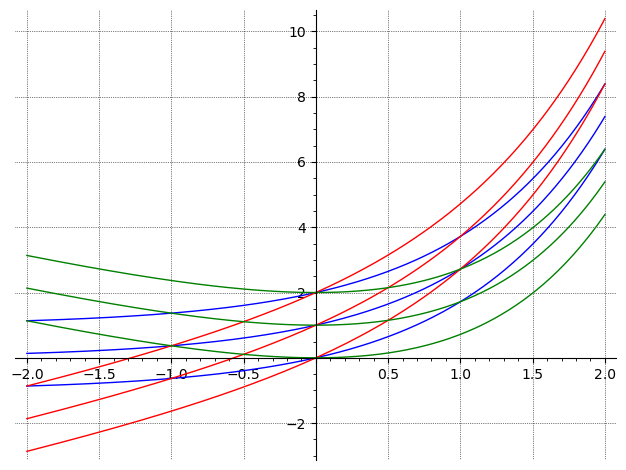

In [8]:
C1_values = [0, 1, -1]
C2_values = [0, 1, -1]
colors = ['blue', 'red', 'green']
color_index = 0

plots_list = []
for C1 in C1_values:
    for C2 in C2_values:
        y = C1*x + C2 + exp(x)
        plots_list.append(plot(y, (x, -2, 2), color=colors[color_index]))
    color_index += 1
        
show(sum(plots_list), gridlines=True)

**2. Уравнение $ (x^2 + 1) * (yy'' - y'^{2}) = 2 xyy' $**

In [15]:
x = var('x')
y = function('y')(x)
C1, C2 = var('C1 C2')

de_2 = (x^2 + 1) * (y * diff(y, x, 2) - diff(y, x) ^ 2) == 2 * x * y * diff(y, x)
show(de_2)

-(x^2 + 1)*(diff(y(x), x)^2 - y(x)*diff(y(x), x, x)) == 2*x*y(x)*diff(y(x), x)

Это уравнение `desolve` тоже не берет, произведем замену $ u = \frac{y'}{y} $

In [16]:
u = function('u')(x)
de_u = (x^2 + 1)*diff(u, x) - 2*x*u == 0
show(de_u)

-2*x*u(x) + (x^2 + 1)*diff(u(x), x) == 0

Решаем уравнение для $u$

In [17]:
sol_u = desolve(de_u, u)
show(sol_u)

(x^2 + 1)*_C

Возврат к $y$

In [18]:
y_general = C2 * exp(integral(sol_u, x))
show(y_general)

C2*e^(1/3*(x^3 + 3*x)*_C)

Построим графики

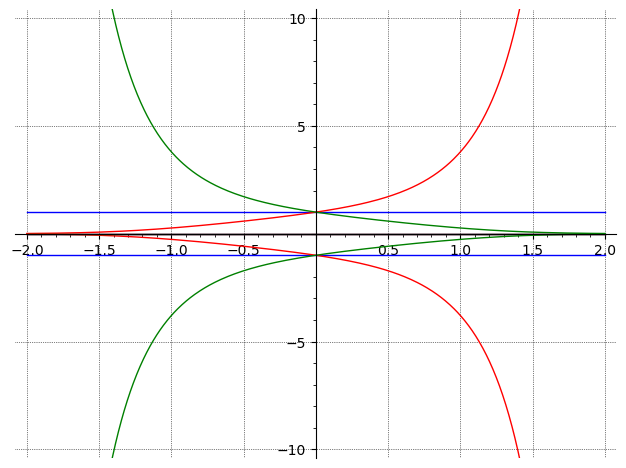

In [27]:
C1_values = [0, 1, -1]
C2_values = [0, 1, -1]
colors = ['blue', 'red', 'green']
color_index = 0

plots_list = []
for C1 in C1_values:
    for C2 in C2_values:
        y = y_general.subs(C2=C2, _C=C1)
        plots_list.append(plot(y, (x, -2, 2), color=colors[color_index], ymax=10, ymin=-10))
    color_index += 1
        
show(sum(plots_list), gridlines=True)

**3. Уравнение $ y' = xy'' - e^{y''} $**

**Sagemath** не может получить аналитического решения данного уравнения. Но можно получить численное. Немного поменяем уравнение

In [10]:
x, y = var('x y')

de_3 = y == x * (y ** 2) - e ** (y ** 2)
show(de_3)

y == x*y^2 - e^(y^2)

Используем `desolve_odeint`

In [11]:
Y0 = [0]
x_vals = srange(1, 2.1, 0.01)
sol = desolve_odeint([de_3], dvars=[y], ics=Y0, times=x_vals)

Построим график

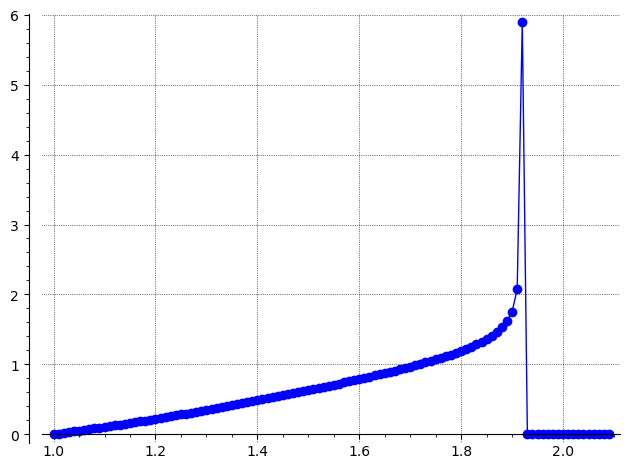

In [12]:
points = list(zip(x_vals, sol))
p = list_plot(points, plotjoined=True, marker='o', color='blue')
p.show(gridlines=True)

**4. Уравнение $ y'' = 2(\frac{y'}{x} - \frac{y}{x^2}) + \frac{1}{x^2}e^{\frac{1}{x}} $**

In [1]:
x = var('x')
y = function('y')(x)

de_4 = diff(y, x, 2) == 2*(diff(y, x)/x - y/x^2) - (1/x^2)*exp(1/x)

**Sagemath** справится с этим уравнением

In [2]:
sol = desolve(de_4, y, ivar=x)
show(sol)

_K1*x^2 - x^2*gamma(2, -1/x) + _K2*x - x*e^(1/x)

Построим графики

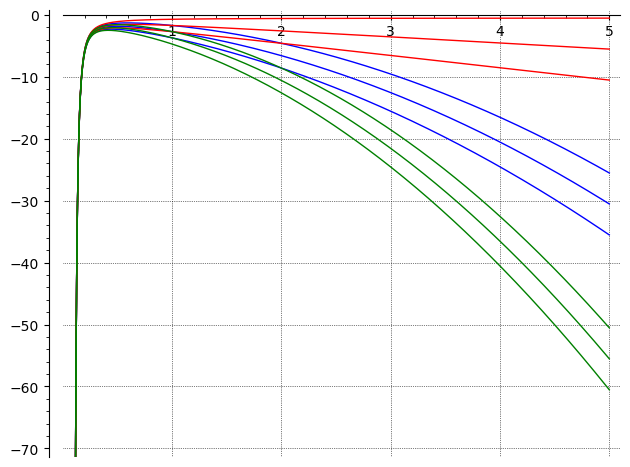

In [7]:
K1_values = [0, 1, -1]
K2_values = [0, 1, -1]
colors = ['blue', 'red', 'green']
color_index = 0

plots_list = []

for K1 in K1_values:
    for K2 in K2_values:
        y = K1*x^2 - x^2*gamma(2, -1/x) + K2*x - x*exp(1/x)
        plots_list.append(plot(y, (x, 0.1, 5), ymin=-70, color=colors[color_index]))
    color_index += 1

# Объединяем графики
final_plot = sum(plots_list)
final_plot.show(gridlines=True)

## **Задание 2.** Найдите общее решение уравнения и сравните с результатом, полученным в системе СКА.

In [15]:
x = var('x')
y = function('y')(x)

de = x * diff(y, x, 3) + diff(y, x, 2) == 1
show(de)

x*diff(y(x), x, x, x) + diff(y(x), x, x) == 1

**Sagemath** не сможет взять это уравнение напрямую. Проведем замену $ y'' = z $

In [16]:
z = function('z')(x)
de_z = x * diff(z, x) + z == 1
show(de_z)

x*diff(z(x), x) + z(x) == 1

Теперь `desolve` справится

In [17]:
sol_z = desolve(de_z, z)
show(sol_z)

(_C + x)/x

Получим $ y' $ через интегрирование $ z $.

In [18]:
y_diff = integrate(sol_z, x)
show(y_diff)

_C*log(x) + x

Найдем $ y $ через интегрирование $ y' $.

In [19]:
y_sol = integrate(y_diff, x)
show(y_sol)

(x*log(x) - x)*_C + 1/2*x^2

## **Задание 3.** Найдите общее решение дифференциального уравнения.

In [20]:
x = var('x')
y = function('y')(x)

de = diff(y, x, 2) - 4 * diff(y, x) + 4 * y == -exp(2 * x) * sin (6 * x)
show(de)

4*y(x) - 4*diff(y(x), x) + diff(y(x), x, x) == -e^(2*x)*sin(6*x)

Здесь `desolve` уже справится.

In [21]:
show(desolve(de, y))

(_K2*x + _K1)*e^(2*x) + 1/36*e^(2*x)*sin(6*x)

Было получено решение состоящее из двух частей:
1. Однородная часть

$$
(K_{1} + K_{2}x)e^{2x}
$$

2. Частное решение

$$
\frac{1}{36}*e^{2x}sin(6x)
$$